# Loan Eligibility Prediction Analysis and Model training/testing file

## Sanity Check

In [21]:
import warnings
warnings.filterwarnings('ignore')
from scripts.temp import temp_fun
temp_fun()

Confirming that relative imports work


## Fetch and Read the data

In [22]:
# Just import and run
from scripts.data_fetch import download_dataset
import pandas as pd

# Download
download_dataset()

# # Load data
df = pd.read_csv('data/Loan Eligibility Prediction.csv')  # adjust filename if needed
df.head()

Downloading: avineshprabhakaran/loan-eligibility-prediction
Dataset URL: https://www.kaggle.com/datasets/avineshprabhakaran/loan-eligibility-prediction
Downloaded to ./data/


,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


## Exploratory Data Analysis


In [23]:
# cell for EDA functions 

## Model Training 

In [24]:
from scripts.model_train import *

# Preprocess
X_train, X_test, y_train, y_test, features, scaler = preprocess_data(df)

# Train and save model
model = train_classifier(X_train, y_train)


 Data preprocessed with one-hot encoding
  Training samples: 491
  Testing samples: 123
  Number of features: 12
  Target distribution - Approved: 422, Rejected: 192

Training Logistic Regression...

Model trained successfully
  Training Accuracy: 0.8086

Model saved to: models/logistic_regression_model.pkl


## Model Testing

In [ ]:
from sklearn.model_selection import cross_validate


# Cross-validation with classification metrics
classification_metrics = ["accuracy", "precision", "recall", "f1"]
cross_val_results = pd.DataFrame(cross_validate(model, X_train, y_train, scoring=classification_metrics)).agg(['mean', 'std']).round(3).T
cross_val_results

,mean,std
fit_time,0.002,0.001
score_time,0.003,0.000
test_accuracy,0.808,0.030
test_precision,0.791,0.020
test_recall,0.979,0.025
test_f1,0.875,0.020


## Accuracy Score

In [ ]:
# Accuracy Score
accuracy_score = model.score(X_test, y_test)
accuracy_score

0.8048780487804879

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

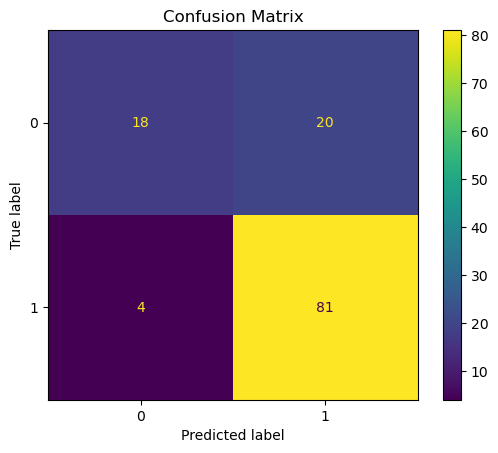

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
confmat = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
)
confmat.ax_.set_title("Confusion Matrix")

## Classification Report

In [46]:
from sklearn.metrics import classification_report

# Classification Report
report = pd.DataFrame(classification_report(y_test, model.predict(X_test), output_dict=True))
report.rename(columns={'0': False, '1': True}, inplace=True)
report

,False,True,accuracy,macro avg,weighted avg
precision,0.818182,0.801980,0.804878,0.810081,0.806986
recall,0.473684,0.952941,0.804878,0.713313,0.804878
f1-score,0.600000,0.870968,0.804878,0.735484,0.787254
support,38.000000,85.000000,0.804878,123.000000,123.000000


## Precision Recall Curve

Text(0.5, 1.0, 'Precision-Recall curve')

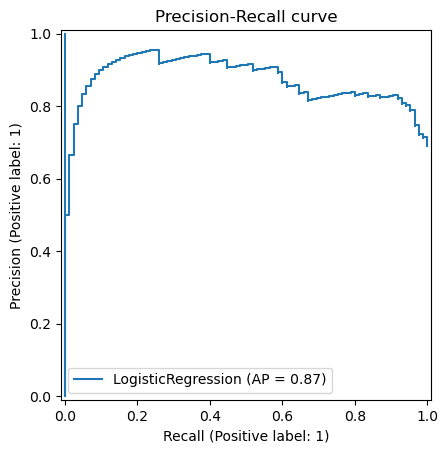

In [47]:
from sklearn.metrics import PrecisionRecallDisplay

# Precision Recall Curve
disp = PrecisionRecallDisplay.from_estimator(
    model,
    X_test,
    y_test
)
disp.ax_.set_title("Precision-Recall curve")

## ROC Curve

Text(0.5, 1.0, 'ROC Curve')

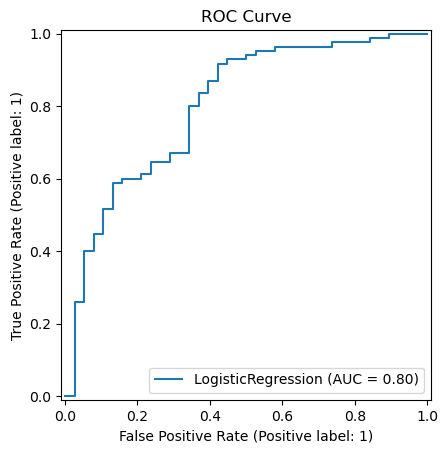

In [48]:
from sklearn.metrics import RocCurveDisplay

# ROC Curve
roc_disp = RocCurveDisplay.from_estimator(
    model,
    X_test,
    y_test
)
roc_disp.ax_.set_title("ROC Curve")